<a href="https://colab.research.google.com/github/francodem/ai-engineering-from-scrimba/blob/main/scrimba_hugging_face_inference_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Huggingface Inference-API
### Examples of how to use it

In [2]:
# Install hugging face inference lib
!pip install huggingface_hub

In [7]:
from huggingface_hub import InferenceClient
from google.colab import userdata

# Getting the token
HF_TOKEN = userdata.get('HF_TOKEN')

# HF client instance
client = InferenceClient(token=HF_TOKEN)

### Text Generation sample

In [8]:
# text generation
input_tg = "Who is the president from México?"

# completion
client.text_generation(input_tg, model="google/gemma-2-2b-it")

'\n\nThe president of Mexico is **Andrés Manuel López Obrador**. \n'

### Text-to-speech sample

In [20]:
import requests

API_URL = "https://api-inference.huggingface.co/models"
tts_endpoint = "/espnet/kan-bayashi_ljspeech_vits"
headers = {"Authorization": f"Bearer {HF_TOKEN}"}

def query(payload):
	response = requests.post(API_URL+tts_endpoint, headers=headers, json=payload)
	return response.content, response.status_code

audio_bytes, response_code = query({
	"inputs": "Welcome to Scrimba AI Engineering specialization!",
})

if response_code == 200:
  # You can access the audio with IPython.display for example
  from IPython.display import Audio
  audio = Audio(audio_bytes)
  print("Audio created.")
else:
  print("Error:", audio_bytes)

Audio created.


In [21]:
audio

### Image-to-text example

In [24]:
image_path = "/content/jupyter.jpg"

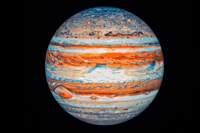

In [47]:
# prompt: Show the image from image_path with 200x200

from PIL import Image
import requests
from io import BytesIO

try:
  #Attempt to open the image directly
  img = Image.open(image_path)
  img.thumbnail((200, 200))
  display(img)

except FileNotFoundError:
  print(f"Error: Image file not found at {image_path}")
except Exception as e:
  print(f"An unexpected error occurred: {e}")


In [53]:
# Put the model here
model = "Salesforce/blip-image-captioning-base"

# Making the prompt
output = client.image_to_text(
    image=image_path,
    model=model
)

In [54]:
output

ImageToTextOutput(generated_text='the planet jupiter, with its red and blue colors', image_to_text_output_generated_text=None)